In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.style as style
import warnings
warnings.filterwarnings('ignore')

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter

In [50]:
data = pd.read_csv("clean_data.csv")
data.drop(['id'], axis=1, inplace=True)
df = data.copy()

In [51]:
df

,case_diabet,case1_risk_diabet,case2_diabet,arthritis,gout,thyroid,chronic_bronchitis,abdominal_pain,gallstones,diabetic_relative,...,creatinine_mg/dL,globulin_g/dL,glucose_mg/dL,potassium_mmol/L,sodium_mmol/L,calcium_mg/dL,triglycerides_mg/dL,uricacid_mg/dL,vigorous_recreational_activities,minutes_sedentary_activity
0,prediabet,risk_diabet,prediabet/undiag,yes,no,no,no,no,no,yes,...,0.92,2.9,85.0,4.0,141.0,9.2,95.0,5.8,no,300.0
1,not_diabet,not_diabet,not_diabet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.81,2.7,94.0,4.4,144.0,9.6,92.0,8.0,no,240.0
2,prediabet,risk_diabet,prediabet/undiag,yes,no,no,no,no,no,yes,...,0.58,3.2,116.0,4.4,144.0,9.5,72.0,4.5,no,120.0
3,prediabet,risk_diabet,prediabet/undiag,yes,no,yes,no,no,yes,yes,...,1.32,3.3,96.0,4.1,141.0,9.9,132.0,6.2,no,600.0
4,prediabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,no,...,1.13,3.1,98.0,4.9,140.0,9.4,59.0,4.2,yes,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,prediabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,no,...,1.05,2.8,96.0,5.3,143.0,9.2,62.0,5.4,no,60.0
5474,diabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,no,...,0.70,2.6,150.0,4.1,143.0,9.9,98.0,6.4,no,120.0
5475,prediabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,no,...,0.92,3.5,101.0,3.8,144.0,9.0,114.0,5.8,no,360.0
5476,not_diabet,not_diabet,not_diabet,no,no,no,no,no,no,yes,...,0.69,2.6,88.0,3.6,137.0,9.0,64.0,3.1,no,600.0


In [52]:
### Feature engineering nutritional status BMI
df['weight_stat'] = df.overweight
df['weight_stat'] = np.where(((df['weight_stat']=='yes')), 'overweight', df['weight_stat'])
df['weight_stat'] = np.where(((df['weight_stat']=='no')), np.nan, df['weight_stat'])

### Weight Status Obese

### International
## bmi>30 -> obese
df['weight_stat'] = np.where(((df['weight_stat'].isnull())&(df['bmi']>30)&~(df['race'] == "A")), 'obese', df['weight_stat'])

### Asian
## bmi>25 -> obese
df['weight_stat'] = np.where(((df['weight_stat'].isnull())&(df['bmi']>25)&(df['race'] == "A")), 'obese', df['weight_stat'])


### Weight Status Underweight International & Asian
## bmi<18.5 -> underweight
df['weight_stat'] = np.where(((df['weight_stat'].isnull())&(df['bmi']<18.5)), 'underweight', df['weight_stat'])

### Normal International
df[(df['weight_stat'].isnull())&(df['bmi']<25)&(df['bmi']>=18.5)&~(df['race'] == "A")]

### Normal Asian
df[(df['weight_stat'].isnull())&(df['bmi']<23)&(df['bmi']>=18.5)&~(df['race'] == "A")]

### Weight Status Normal

### International
## bmi:18.5-25 -> normal
df['weight_stat'] = np.where(((df['weight_stat'].isnull())&(df['bmi']<25)&(df['bmi']>=18.5)&~(df['race'] == "A")), 'normal', df['weight_stat'])

### Asian
## bmi:18.5-23 -> normal
df['weight_stat'] = np.where(((df['weight_stat'].isnull())&(df['bmi']<23)&(df['bmi']>=18.5)&(df['race'] == "A")), 'normal', df['weight_stat'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case_diabet                       5478 non-null   object 
 1   case1_risk_diabet                 5478 non-null   object 
 2   case2_diabet                      4640 non-null   object 
 3   arthritis                         5195 non-null   object 
 4   gout                              5203 non-null   object 
 5   thyroid                           5195 non-null   object 
 6   chronic_bronchitis                5204 non-null   object 
 7   abdominal_pain                    5205 non-null   object 
 8   gallstones                        5197 non-null   object 
 9   diabetic_relative                 5219 non-null   object 
 10  overweight                        5477 non-null   object 
 11  high_bp                           5478 non-null   object 
 12  high_c

In [54]:
df.weight_stat.value_counts()

overweight     4100
normal         1209
underweight      99
Name: weight_stat, dtype: int64

In [55]:
### Save csv file to folder deployment model
df.to_csv(r'C:\Users\dinan\Desktop\Project Diabetes\Deployment Model\clean_data2.csv',index=False, header=True)

In [31]:
df.case_diabet.value_counts()

not_diabet    2325
prediabet     2138
diabet        1015
Name: case_diabet, dtype: int64

In [56]:
import plotly.express as px
barplot = df['weight_stat'].value_counts()
fig = px.bar(x=barplot.index, y=[barplot.values], 
             color=["lightblue","pink", "lightgreen", ], 
             color_discrete_map="identity",
             labels={"value": "Values",
                     "x": "Risk Diabetes",},
             title="Helathy Weight Status",
            )
fig.layout.yaxis.tickformat 
fig.show()

In [57]:
import plotly.express as px
barplot = df['case_diabet'].value_counts()
fig = px.bar(x=barplot.index, y=[barplot.values], 
             color=["lightblue","pink", "lightgreen", ], 
             color_discrete_map="identity",
             labels={"value": "Values",
                     "x": "Risk Diabetes",},
             title="Risk Diabetes",
            )
fig.layout.yaxis.tickformat 
fig.show()

In [45]:
import plotly.graph_objects as go
import plotly.express as px
barplot = df['case_diabet'].value_counts()
fig = go.Figure([
        go.Bar(x=barplot.index, y=barplot.values,meta=["lightblue","pink", "lightgreen",])
        
    ])
fig.show()

In [46]:
import plotly.graph_objects as go
import plotly.express as px
barplot = df['weight_stat'].value_counts()
fig = go.Figure([
        go.Bar(x=barplot.index, y=barplot.values,)
        
    ])
fig.show()

In [47]:
df = pd.read_csv('clean_data.csv')

In [48]:
df

,id,case_diabet,case1_risk_diabet,case2_diabet,arthritis,gout,thyroid,chronic_bronchitis,abdominal_pain,gallstones,...,creatinine_mg/dL,globulin_g/dL,glucose_mg/dL,potassium_mmol/L,sodium_mmol/L,calcium_mg/dL,triglycerides_mg/dL,uricacid_mg/dL,vigorous_recreational_activities,minutes_sedentary_activity
0,93705,prediabet,risk_diabet,prediabet/undiag,yes,no,no,no,no,no,...,0.92,2.9,85.0,4.0,141.0,9.2,95.0,5.8,no,300.0
1,93706,not_diabet,not_diabet,not_diabet,NaN,NaN,NaN,NaN,NaN,NaN,...,0.81,2.7,94.0,4.4,144.0,9.6,92.0,8.0,no,240.0
2,93708,prediabet,risk_diabet,prediabet/undiag,yes,no,no,no,no,no,...,0.58,3.2,116.0,4.4,144.0,9.5,72.0,4.5,no,120.0
3,93709,prediabet,risk_diabet,prediabet/undiag,yes,no,yes,no,no,yes,...,1.32,3.3,96.0,4.1,141.0,9.9,132.0,6.2,no,600.0
4,93711,prediabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,...,1.13,3.1,98.0,4.9,140.0,9.4,59.0,4.2,yes,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,102949,prediabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,...,1.05,2.8,96.0,5.3,143.0,9.2,62.0,5.4,no,60.0
5474,102952,diabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,...,0.70,2.6,150.0,4.1,143.0,9.9,98.0,6.4,no,120.0
5475,102953,prediabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,...,0.92,3.5,101.0,3.8,144.0,9.0,114.0,5.8,no,360.0
5476,102954,not_diabet,not_diabet,not_diabet,no,no,no,no,no,no,...,0.69,2.6,88.0,3.6,137.0,9.0,64.0,3.1,no,600.0


In [59]:
import plotly.express as px
barplot = df['case2_diabet'].value_counts()
fig = px.bar(x=barplot.index, y=[barplot.values], 
             color=["lightblue","pink",  ], 
             color_discrete_map="identity",
             labels={"value": "Values",
                     "x": "Risk Diabetes",},
             title="Risk Prediabetes & Undiagnose Diabtes",
            )
fig.layout.yaxis.tickformat 
fig.show()

In [60]:
df.case2_diabet.value_counts()

not_diabet          2325
prediabet/undiag    2315
Name: case2_diabet, dtype: int64

In [67]:
df[df['case2_diabet']=='prediabet/undiag']['weight_stat'].value_counts()

overweight     1893
normal          383
underweight      22
Name: weight_stat, dtype: int64

In [75]:
import plotly.express as px
barplot = df[df['case2_diabet']=='prediabet/undiag']['weight_stat'].value_counts()
fig = px.bar(x=barplot.index, y=[barplot.values], 
             color=["lightblue","pink",  "blue"], 
             color_discrete_map="identity",
             labels={"value": "Frequency",
                     "x": "Risk Prediabetes & Undiagnose Diabetes",},
             #title="Risk Prediabetes & Undiagnose Diabtes",
            )
fig.layout.yaxis.tickformat 
fig.show()

In [70]:
df

,case_diabet,case1_risk_diabet,case2_diabet,arthritis,gout,thyroid,chronic_bronchitis,abdominal_pain,gallstones,diabetic_relative,...,globulin_g/dL,glucose_mg/dL,potassium_mmol/L,sodium_mmol/L,calcium_mg/dL,triglycerides_mg/dL,uricacid_mg/dL,vigorous_recreational_activities,minutes_sedentary_activity,weight_stat
0,prediabet,risk_diabet,prediabet/undiag,yes,no,no,no,no,no,yes,...,2.9,85.0,4.0,141.0,9.2,95.0,5.8,no,300.0,overweight
1,not_diabet,not_diabet,not_diabet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.7,94.0,4.4,144.0,9.6,92.0,8.0,no,240.0,normal
2,prediabet,risk_diabet,prediabet/undiag,yes,no,no,no,no,no,yes,...,3.2,116.0,4.4,144.0,9.5,72.0,4.5,no,120.0,overweight
3,prediabet,risk_diabet,prediabet/undiag,yes,no,yes,no,no,yes,yes,...,3.3,96.0,4.1,141.0,9.9,132.0,6.2,no,600.0,overweight
4,prediabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,no,...,3.1,98.0,4.9,140.0,9.4,59.0,4.2,yes,420.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,prediabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,no,...,2.8,96.0,5.3,143.0,9.2,62.0,5.4,no,60.0,normal
5474,diabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,no,...,2.6,150.0,4.1,143.0,9.9,98.0,6.4,no,120.0,normal
5475,prediabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,no,...,3.5,101.0,3.8,144.0,9.0,114.0,5.8,no,360.0,overweight
5476,not_diabet,not_diabet,not_diabet,no,no,no,no,no,no,yes,...,2.6,88.0,3.6,137.0,9.0,64.0,3.1,no,600.0,overweight


In [83]:
barplot1 = df[df['case1_risk_diabet']=='not_diabet']['weight_stat'].value_counts()

fig = go.Figure([go.Bar(x=barplot1.index, y=barplot1.values)])
fig.show()

In [80]:
df

,case_diabet,case1_risk_diabet,case2_diabet,arthritis,gout,thyroid,chronic_bronchitis,abdominal_pain,gallstones,diabetic_relative,...,globulin_g/dL,glucose_mg/dL,potassium_mmol/L,sodium_mmol/L,calcium_mg/dL,triglycerides_mg/dL,uricacid_mg/dL,vigorous_recreational_activities,minutes_sedentary_activity,weight_stat
0,prediabet,risk_diabet,prediabet/undiag,yes,no,no,no,no,no,yes,...,2.9,85.0,4.0,141.0,9.2,95.0,5.8,no,300.0,overweight
1,not_diabet,not_diabet,not_diabet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.7,94.0,4.4,144.0,9.6,92.0,8.0,no,240.0,normal
2,prediabet,risk_diabet,prediabet/undiag,yes,no,no,no,no,no,yes,...,3.2,116.0,4.4,144.0,9.5,72.0,4.5,no,120.0,overweight
3,prediabet,risk_diabet,prediabet/undiag,yes,no,yes,no,no,yes,yes,...,3.3,96.0,4.1,141.0,9.9,132.0,6.2,no,600.0,overweight
4,prediabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,no,...,3.1,98.0,4.9,140.0,9.4,59.0,4.2,yes,420.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,prediabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,no,...,2.8,96.0,5.3,143.0,9.2,62.0,5.4,no,60.0,normal
5474,diabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,no,...,2.6,150.0,4.1,143.0,9.9,98.0,6.4,no,120.0,normal
5475,prediabet,risk_diabet,prediabet/undiag,no,no,no,no,no,no,no,...,3.5,101.0,3.8,144.0,9.0,114.0,5.8,no,360.0,overweight
5476,not_diabet,not_diabet,not_diabet,no,no,no,no,no,no,yes,...,2.6,88.0,3.6,137.0,9.0,64.0,3.1,no,600.0,overweight


In [81]:
df.case1_risk_diabet.value_counts()

risk_diabet    3196
not_diabet     2282
Name: case1_risk_diabet, dtype: int64

In [77]:
df[df['case1_risk_diabet']=='diabet']['weight_stat']

Series([], Name: weight_stat, dtype: object)

In [82]:
import plotly.express as px
barplot = df[df['case1_risk_diabet']=='not_diabet']['weight_stat'].value_counts()
fig = px.bar(x=barplot.index, y=[barplot.values], 
             color=["lightblue","pink",  "blue"], 
             color_discrete_map="identity",
             labels={"value": "Frequency",
                     "x": "Risk Diabetes",},
             #title="Risk Prediabetes & Undiagnose Diabtes",
            )
fig.layout.yaxis.tickformat 
fig.show()

In [84]:
df.case_diabet.value_counts()

not_diabet    2325
prediabet     2138
diabet        1015
Name: case_diabet, dtype: int64

In [107]:
import plotly.express as px
barplot = df['case_diabet'].value_counts()
fig = px.bar(x=barplot.index, y=[barplot.values], 
             color=["lightblue","pink", "lightgreen", ], 
             color_discrete_map="identity",
             labels={"value": "Count",
                     "x": "Risk Diabetes",},
             title="Category Diabetic Risk",
            )
fig.layout.yaxis.tickformat 
fig.show()

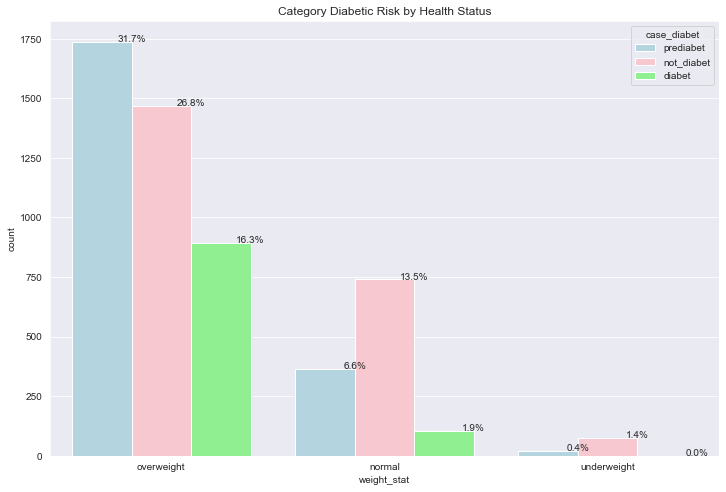

In [109]:
total = float(len(df['case_diabet']))
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
ax = sns.countplot(x = df['weight_stat'], data=df, hue='case_diabet',palette=['#add8e6',"#ffc0cb", "#80ff80",])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.title("Category Diabetic Risk by Health Status")
plt.show()
    

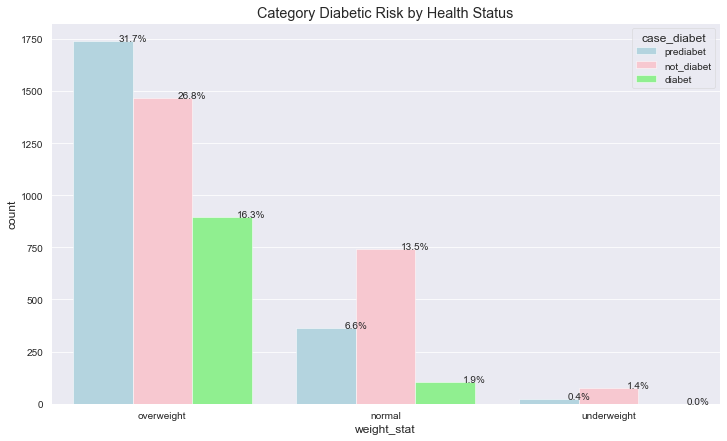

In [113]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
total = float(len(df['case_diabet']))
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
ax = sns.countplot(x = df['weight_stat'], data=df, hue='case_diabet',palette=['#add8e6',"#ffc0cb", "#80ff80",])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.title("Category Diabetic Risk by Health Status")
#plt.show()
fig = ax.get_figure()
fig.savefig("category_health.png")